In [2]:
from PIL import Image
import numpy
import random
import math

apple = Image.open("banner.png")
array = numpy.array(apple)


for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j][0] > 150:
            array[i][j] = [0,min(255,2 * array[i][j][1]),min(255,2 * array[i][j][2]), 255]
        array[i][j][0] += random.uniform(-0.1, 0.1)
        array[i][j][1] += random.uniform(-0.1, 0.1)
        array[i][j][2] += random.uniform(-0.1, 0.1)
        array[i][j][3] += random.uniform(-0.1, 0.1)

apple2 = Image.fromarray(array)
apple2.show()

FileNotFoundError: [Errno 2] No such file or directory: 'banner.png'

[ 30.  29.  29.  29.  29.  29.  28.  28.  28.  29.  31.  30.  29.  30.
  31.  30.  30.  28.  29.  32.  32.  31.  31.  32.  29.  29.  30.  32.
  30.  30.  31.  32.  28.  31.  31.  31.  33.  33.  33.  32.  32.  32.
  32.  32.  33.  34.  37.  35.  35.  36.  35.  35.  35.  35.  35.  34.
  35.  35.  35.  37.  36.  35.  37.  41.  41.  40.  39.  40.  49.  54.
  61.  67. 116. 125. 130. 133. 137. 147. 148. 149. 151. 151. 153. 153.
 152. 153. 155. 155. 156. 157. 156. 156. 156. 157. 158. 157. 159. 159.
 159. 160. 160. 160. 162. 163. 163. 163. 164. 164. 165. 165. 165. 166.
 166. 166. 166. 166. 166. 166. 166. 166. 167. 168. 169. 168. 168. 168.
 169. 169. 169. 169. 170. 171. 171. 170. 172. 173. 172. 173. 174. 175.
 175. 174. 174. 175. 175. 175. 175. 176. 176. 177. 178. 178. 177. 178.
 179. 179. 178. 178. 179. 179. 178. 179. 180. 181. 181. 180. 181. 182.
 182. 182. 182. 183. 182. 182. 183. 184. 184. 184. 185. 185. 185. 185.
 187. 187. 186. 185. 186. 187. 188. 189. 189. 189. 189. 190. 190. 190.
 191. 

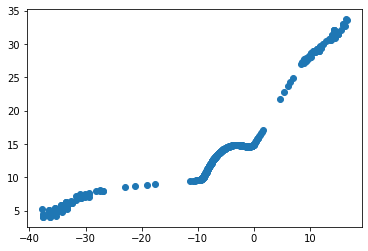

In [1]:
from PIL import Image
import numpy
from Controller import converter
import cv2

from matplotlib import pyplot

leftImg, rightImg = numpy.split(numpy.array(Image.open("img7.png")), 2, axis=1)

def show(img):
    Image.fromarray(img).show()

# show(leftImg)

# filteredLeftImg = converter.filter(leftImg)
# leftEdgesImage, gLeftIn, rLeftIn = cv2.split(filteredLeftImg)
leftBlurredIn, leftEdgesIn, gLeftIn, rLeftIn = converter.filter(leftImg)
show(leftBlurredIn)
# show(leftEdgesImage)

# filteredRightImg = converter.filter(rightImg)
# rightEdgesImage, gRightIn, rRightIn = cv2.split(filteredRightImg)
rightBlurredIn, rightEdgesIn, gRightIn, rRightIn = converter.filter(rightImg)

distances, croppedLeft, rawHeightsLeft = converter.getDistances(leftBlurredIn, leftEdgesIn, rightBlurredIn, rightEdgesIn)

# for i in rawHeightsLeft:
#     croppedLeft[i][rawHeightsLeft[i]] = 125
# show(croppedLeft)
# image = []

print(rawHeightsLeft)

# # print(heights)
# # print(left)
# print(distances)
x = []
y = []
for i in distances:
    print(i)
    if i[2] < 200:
        x.append(i[0])
        y.append(i[1])

pyplot.scatter(x, y)
# for i in range(len(rawHeightsLeft)):
#     print(rawHeightsLeft[i])
#     print(distances[i])

# for i in distances:
#     image.append([i[2], i[2], i[2]])
# show(numpy.array(image))
# show(numpy.concatenate(([distances], [distances], [distances]), axis=0))
rBlobs, gBlobs = converter.getBlobs(rLeftIn, gLeftIn, rRightIn, gRightIn)

print(gBlobs)

outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks = converter.getLandmarks(distances, rBlobs, gBlobs)

# for landmark in outerWallLandmarks:
#     if landmark[2] < 30:
#         print(landmark)
print(outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks)

In [ ]:
import math

horizontalFov = 155
verticalFov = 115
imageWidth = 272
imageHeight = 154
focalLength = ((imageHeight / 2) / math.tan(math.pi * (verticalFov / 2) / 180))
wallHeight = 10
centerOffset = 10
dist = wallHeight * math.sqrt(focalLength**2 + (imageWidth / 2 - 29)**2) / 36
# return (dir * (3 + a[1] * dist), (10 + a[2] * dist), dist)

print(focalLength)
dist